In [302]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [492]:
csvs = os.listdir("csv")
csvs

['19_Kadarka_12nap_class.csv',
 '19_Kadarka_3nap_class.csv',
 '19_Kadarka_6nap_class.csv',
 '19_Kadarka_9nap_class.csv',
 '19_Kadarka_must.csv',
 '19_Kadarka_ujbor_class.csv',
 '21 Kadarka_6_12nap.csv',
 '21 Kadarka_must_3nap.csv']

In [493]:
for n in range(0,len(csvs)):
    csvs[n] = "e:/Jupyter/csv/" + csvs[n]
csvs

['e:/Jupyter/csv/19_Kadarka_12nap_class.csv',
 'e:/Jupyter/csv/19_Kadarka_3nap_class.csv',
 'e:/Jupyter/csv/19_Kadarka_6nap_class.csv',
 'e:/Jupyter/csv/19_Kadarka_9nap_class.csv',
 'e:/Jupyter/csv/19_Kadarka_must.csv',
 'e:/Jupyter/csv/19_Kadarka_ujbor_class.csv',
 'e:/Jupyter/csv/21 Kadarka_6_12nap.csv',
 'e:/Jupyter/csv/21 Kadarka_must_3nap.csv']

In [494]:
data = [pd.read_csv(f) for f in csvs]

In [495]:
def preprocess(f):
    f = f.drop("Remark",1)
    f = f.drop("Type",1)
    f = f.dropna(axis=0, how="all")
    f = f.dropna(thresh=2)
    f = f.rename(columns = {"Glucose/Fructose":"GluFruc"})
    f = f.rename(columns = {"TartaricAcid":"Tartaric Acid", "Total Acidity":"Total Acidity pH 7.0"})
    rows_with_sample = f["ID"].str.contains('GINOP').fillna(False)
    samples = f[rows_with_sample]
    rows_with_rawdata = samples["SubType"].str.contains('SUBSAMPLE').fillna(False)
    samples_raw = samples[rows_with_rawdata]
    sr_row_names = list(samples_raw.index.values)
    for n in range(0,len(sr_row_names)):
        samples_raw = samples_raw.rename(index = {sr_row_names[n]:n})
    for n in range(0,len(samples_raw.iloc[:,0])):
        nev = samples_raw.iloc[n,0]
        nev2 = nev.replace("\x82","e")
        nev3 = nev2.replace(" ","_")
        nev4 = nev3.replace("6_nap","6nap")
        nev5 = nev4.replace(".","")
        nev6 = nev5.replace("\xe9","e")
        nev7 = nev6.replace("?","e")
        nev8 = nev7.replace("ejbor","ujbor")
        nev8 = nev8 + "_"
        samples_raw.iloc[n,0] = nev8.replace("\xe9","u")
    fajta = ["Kadarka","Leanyka","KF"]
    for n in range(0,len(samples_raw.iloc[:,0])):
        mintanev = samples_raw.iloc[n,0]
        samples_raw["Fajta"] = next((x for x in fajta if x in mintanev), False)
    terheles = ["Class","Prem","class", "prem", "premium"]
    samples_raw["Class"] = 0
    klon = ["P9", "menesi", "men", "Men", "M"]
    samples_raw["Clone"] = 0
    idopont = ["3nap", "6nap", "9nap", "12nap", "must", "ujbor", "Must"]
    samples_raw["SamplingTime"] = 0
    ismetles = ["_I_", "_II_", "_III_"]
    samples_raw["Replicate"] = 0
    szuret = ["19", "19fok", "21", "21fok", "21+2", "21+2het", "21+2+2", "21+4", "21+2+2het", "21+4het"]
    samples_raw["Harvest"] = 0
    n=0
    for n in range(0,len(samples_raw.iloc[:,0])):
        mintanev = samples_raw.iloc[n,0]
        samples_raw.loc[n,"Class"] = next((x for x in terheles if x in mintanev), "Class")
        samples_raw.loc[n,"Clone"] = next((x for x in klon if x in mintanev), False)
        samples_raw.loc[n,"SamplingTime"] = next((x for x in idopont if x in mintanev), "Must")
        samples_raw.loc[n,"Replicate"] = next((x for x in ismetles if x in mintanev), False)
        #samples_raw.loc[n,"Replicate"] = next((x for x in ismetles if (re.search(x, mintanev)) is not None), 0)
        samples_raw.loc[n,"Harvest"] = next((x for x in szuret if x in mintanev), "19")
    samples_raw["Class"] = samples_raw["Class"].map({"class":"Classic", "Class":"Classic", "Prem":"Premium","prem":"Premium","premium":"Premium",})
    samples_raw["Clone"] = samples_raw["Clone"].map({"menesi":"Menesi","Men":"Menesi", "men":"Menesi","M":"Menesi", "P9":"P9"})
    samples_raw["Replicate"] = samples_raw["Replicate"].map({"_I_":1, "_II_":2, "_III_":3," I":1, " II":2, " III":3})
    samples_raw["Harvest"] = samples_raw["Harvest"].map({"19":"19fok", "21":"21fok", "21+2":"21+2het", "21+2+2":"21+4het", "21+2+2het":"21+4het", " III":3})
    return samples_raw

In [496]:
frames = [ preprocess(f) for f in data ]
result = pd.concat(frames, axis=0)

In [497]:
result_clear = result.dropna(axis=1, how="all")
result_clear = result_clear.drop("Date",1)
result_clear = result_clear.drop("Product",1)
result_clear = result_clear.drop("Replicate",1)
result_clear = result_clear.drop("ID",1)
result_clear = result_clear.drop("SubType",1)
result_clear = result_clear.drop("Time",1)
result_clear.head()

,A420,A520,A620,Alpha Amino,Brix,CO2,CitricAcid,Class,Clone,Density,...,LacticAcid,Malic Acid,Potassium,Reducing sugar,SamplingTime,Sorbic acid,Tartaric Acid,Total Acidity pH 7.0,Volatile Acidity,pH
0,0.252,0.295,0.056,NaN,NaN,1129.78,0.55,Classic,P9,1.0346,...,0.3,1.66,NaN,96.9,12nap,141,2.8,7,0.66,3.39
1,0.259,0.307,0.059,NaN,NaN,1139.29,0.55,Classic,P9,1.0345,...,0.3,1.78,NaN,97.6,12nap,57,2.6,7,0.65,3.38
2,0.241,0.293,0.048,NaN,NaN,1142.93,0.55,Classic,P9,1.0345,...,0.2,2.02,NaN,96.7,12nap,95,2.8,7.2,0.63,3.36
3,0.244,0.296,0.051,NaN,NaN,1147.61,0.54,Classic,P9,1.0343,...,0.4,1.86,NaN,96.4,12nap,88,2.8,7.2,0.64,3.33
4,0.236,0.264,0.047,NaN,NaN,1137.91,0.55,Classic,P9,1.037,...,0,1.83,NaN,103.1,12nap,71,3.1,7.1,0.72,3.34


In [498]:
result_clear["SamplingTime"].unique()

array(['12nap', '3nap', '6nap', '9nap', 'Must', 'ujbor'], dtype=object)

In [499]:
result_clear["Day"] = result_clear["SamplingTime"].map({"12nap":12, "Must":0, "3nap":3,"6nap":6, "9nap":9, "ujbor":15})

In [502]:
result_clear = result_clear.drop("SamplingTime",1)
result_clear["Day"].unique()

array([12,  3,  6,  9,  0, 15], dtype=int64)

In [503]:
result_clear["Class"].unique()

array(['Classic', 'Premium'], dtype=object)

In [504]:
result_typ = result_clear.apply(pd.to_numeric, errors='ignore')
result_typ.dtypes

A420                    float64
A520                    float64
A620                    float64
Alpha Amino             float64
Brix                    float64
CO2                     float64
CitricAcid              float64
Class                    object
Clone                    object
Density                 float64
Ethanol                 float64
Extract                 float64
Fajta                    object
FolinCindex             float64
Fructose                float64
GluFruc                 float64
Gluconic acid           float64
Glucose                 float64
Glycerol                float64
Harvest                  object
LacticAcid              float64
Malic Acid              float64
Potassium               float64
Reducing sugar          float64
Sorbic acid             float64
Tartaric Acid           float64
Total Acidity pH 7.0    float64
Volatile Acidity        float64
pH                      float64
Day                       int64
dtype: object

In [505]:
result_clear = result_clear.drop("Fajta",1)

In [506]:
gb = result_typ.groupby(['Clone', "Class", "Harvest", "Day"])


In [507]:
gb

In [513]:
means = gb.mean()
means.head()

A420      A520      A620  Alpha Amino   Brix  \
Clone  Class   Harvest Day                                                     
Menesi Classic 19fok   0         NaN       NaN       NaN   136.333333  26.05   
                       3    0.190333  0.171333  0.060167          NaN    NaN   
                       6    0.251000  0.219833  0.105333          NaN    NaN   
                       9    0.244167  0.239000  0.134167          NaN    NaN   
                       12   0.168167  0.122333  0.042167          NaN    NaN   

                                    CO2  CitricAcid   Density    Ethanol  \
Clone  Class   Harvest Day                                                 
Menesi Classic 19fok   0            NaN         NaN  1.109642        NaN   
                       3    1325.135000    0.780000  1.113050   0.585000   
                       6    1047.800000    0.640000  1.084733   2.253333   
                       9    1531.786667    0.621667  1.034867   9.231667   
                       12   1150.013333    0.550000  1.009350  13.208333   

                               Extract    ...      Glycerol  LacticAcid  \
Clone  Class   Harvest Day                ...                             
Menesi Classic 19fok   0    292.933333    ...           NaN         NaN   
                       3           NaN    ...      1.200000    0.000000   
                       6           NaN    ...      2.516667    0.050000   
                       9           NaN    ...      7.850000    1.200000   
                       12          NaN    ...     10.533333    0.233333   

                            Malic Acid  Potassium  Reducing sugar  \
Clone  Class   Harvest Day                                          
Menesi Classic 19fok   0      3.850000     1717.5      275.650000   
                       3      3.735000        NaN      264.333333   
                       6      2.673333        NaN      198.550000   
                       9      2.511667        NaN       94.566667   
                       12     2.613333        NaN       37.150000   

                            Sorbic acid  Tartaric Acid  Total Acidity pH 7.0  \
Clone  Class   Harvest Day                                                     
Menesi Classic 19fok   0            NaN       4.866667              5.583333   
                       3      81.000000       4.416667              5.883333   
                       6      65.666667       4.666667              6.033333   
                       9      96.000000       2.533333              6.500000   
                       12     96.166667       1.900000              6.183333   

                            Volatile Acidity        pH  
Clone  Class   Harvest Day                              
Menesi Classic 19fok   0                 NaN  3.545000  
                       3            0.843333  4.080000  
                       6            0.851667  3.835000  
                       9            0.593333  3.698333  
                       12           0.625000  3.765000  

[5 rows x 25 columns]

In [514]:
errors = gb.std()
errors

A420      A520      A620  Alpha Amino  \
Clone  Class   Harvest Day                                              
Menesi Classic 19fok   0         NaN       NaN       NaN     4.589844   
                       3    0.010948  0.016705  0.004750          NaN   
                       6    0.046930  0.049073  0.015706          NaN   
                       9    0.006401  0.018472  0.007782          NaN   
                       12   0.007808  0.009395  0.004355          NaN   
                       15   0.012112  0.003670  0.002317          NaN   
               21fok   0         NaN       NaN       NaN     8.658329   
                       3         NaN       NaN       NaN     6.940221   
                       6    0.056804  0.057764  0.037238          NaN   
                       9    0.038452  0.037773  0.038452          NaN   
                       12   0.009832  0.007528  0.005164          NaN   
                       15   0.013663  0.008944  0.000000          NaN   
       Premium 21fok   0         NaN       NaN       NaN     6.022055   
                       3         NaN       NaN       NaN     4.381780   
                       6    0.029464  0.023592  0.018172          NaN   
                       9    0.048385  0.053702  0.052898          NaN   
                       12   0.007528  0.007528  0.004082          NaN   
                       15   0.004629  0.007559  0.005175          NaN   
P9     Classic 19fok   0         NaN       NaN       NaN     8.914408   
                       3    0.039697  0.041549  0.025980          NaN   
                       6    0.011990  0.074684  0.008548          NaN   
                       9    0.006066  0.018298  0.004401          NaN   
                       12   0.008571  0.017612  0.004708          NaN   
                       15   0.013084  0.016753  0.018089          NaN   
               21fok   0         NaN       NaN       NaN     4.457204   
                       3         NaN       NaN       NaN     7.941452   
                       6    0.028752  0.044121  0.015055          NaN   
                       9    0.014142  0.016432  0.011690          NaN   
                       12   0.005164  0.005164  0.000000          NaN   
                       15   0.005164  0.004082  0.000000          NaN   
       Premium 21fok   0         NaN       NaN       NaN     6.889606   
                       3         NaN       NaN       NaN    11.000000   
                       6    0.057764  0.029496  0.050465          NaN   
                       9    0.005000  0.005774  0.005774          NaN   
                       12   0.005774  0.005774  0.000000          NaN   
                       15   0.005000  0.010000  0.005000          NaN   

                                Brix         CO2  CitricAcid   Density  \
Clone  Class   Harvest Day                                               
Menesi Classic 19fok   0    0.225832         NaN         NaN  0.002618   
                       3         NaN   19.381717    0.095289  0.001167   
                       6         NaN  155.430700    0.055857  0.017187   
                       9         NaN  135.859885    0.057067  0.001365   
                       12        NaN   53.312346    0.027568  0.001900   
                       15        NaN   28.251990    0.037283  0.000126   
               21fok   0    0.194079         NaN         NaN  0.004082   
                       3    0.711805         NaN         NaN  0.004082   
                       6         NaN   84.934525    0.094110  0.004082   
                       9         NaN   84.324790    0.661125  0.016036   
                       12        NaN  125.271485    0.028983  0.005164   
                       15        NaN  150.837232    0.056569  0.000000   
       Premium 21fok   0    0.472582         NaN         NaN  0.005149   
                       3    0.109545         NaN         NaN  0.000000   
                       6         NaN    9.401567    0.083630  0.004688   

In [515]:
means["Ethanol"]

Clone   Class    Harvest  Day
Menesi  Classic  19fok    0            NaN
                          3       0.585000
                          6       2.253333
                          9       9.231667
                          12     13.208333
                          15     15.355000
                 21fok    0            NaN
                          3            NaN
                          6       0.746667
                          9       8.001250
                          12     13.998333
                          15     17.250000
        Premium  21fok    0            NaN
                          3            NaN
                          6       0.983571
                          9       7.095000
                          12     12.305000
                          15     18.121250
P9      Classic  19fok    0            NaN
                          3       0.296667
                          6       2.486667
                          9       6.498333
                        

In [516]:
means["Ethanol"] = means["Ethanol"].fillna(0)
means["Ethanol"]

Clone   Class    Harvest  Day
Menesi  Classic  19fok    0       0.000000
                          3       0.585000
                          6       2.253333
                          9       9.231667
                          12     13.208333
                          15     15.355000
                 21fok    0       0.000000
                          3       0.000000
                          6       0.746667
                          9       8.001250
                          12     13.998333
                          15     17.250000
        Premium  21fok    0       0.000000
                          3       0.000000
                          6       0.983571
                          9       7.095000
                          12     12.305000
                          15     18.121250
P9      Classic  19fok    0       0.000000
                          3       0.296667
                          6       2.486667
                          9       6.498333
                        

In [517]:
means.unstack()["Ethanol"]

Day                      0         3         6         9          12  \
Clone  Class   Harvest                                                 
Menesi Classic 19fok    0.0  0.585000  2.253333  9.231667  13.208333   
               21fok    0.0  0.000000  0.746667  8.001250  13.998333   
       Premium 21fok    0.0  0.000000  0.983571  7.095000  12.305000   
P9     Classic 19fok    0.0  0.296667  2.486667  6.498333   9.228333   
               21fok    0.0  0.000000  1.676667  5.688333  10.141667   
       Premium 21fok    0.0  0.000000  1.788333  6.457500  10.020000   

Day                            15  
Clone  Class   Harvest             
Menesi Classic 19fok    15.355000  
               21fok    17.250000  
       Premium 21fok    18.121250  
P9     Classic 19fok    14.676667  
               21fok    16.680000  
       Premium 21fok    16.080000

In [518]:
means.unstack()["Ethanol"].transpose()

Clone       Menesi                               P9                      
Class      Classic               Premium    Classic               Premium
Harvest      19fok      21fok      21fok      19fok      21fok      21fok
Day                                                                      
0         0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
3         0.585000   0.000000   0.000000   0.296667   0.000000   0.000000
6         2.253333   0.746667   0.983571   2.486667   1.676667   1.788333
9         9.231667   8.001250   7.095000   6.498333   5.688333   6.457500
12       13.208333  13.998333  12.305000   9.228333  10.141667  10.020000
15       15.355000  17.250000  18.121250  14.676667  16.680000  16.080000

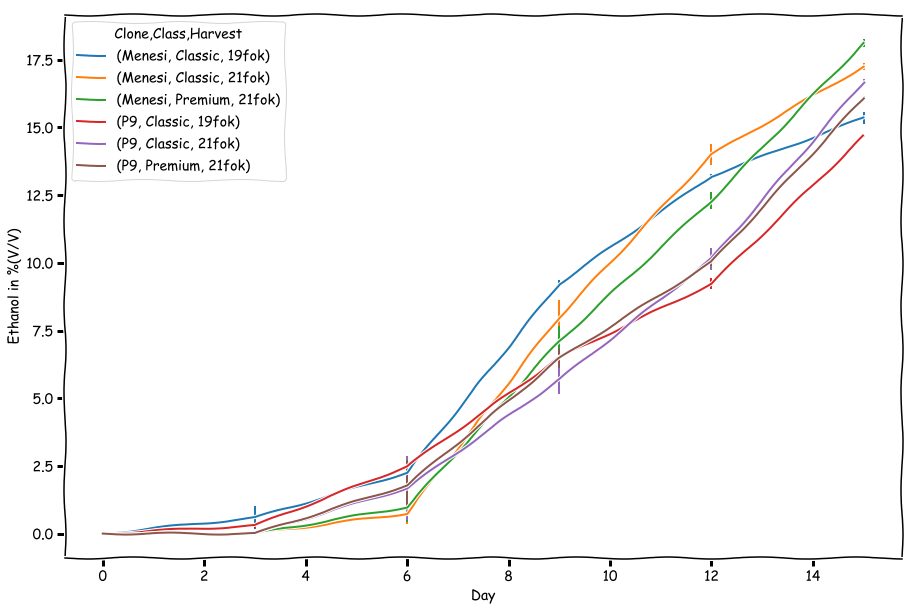

In [511]:
means["Ethanol"] = means["Ethanol"].fillna(0)
with plt.xkcd():    
    fig, ax = plt.subplots(figsize=(15,10))
    means.unstack()["Ethanol"].transpose().plot(yerr=errors.unstack()["Ethanol"].transpose(), ax=ax)
    plt.ylabel('Ethanol in %(V/V)')
    fig.savefig('e:/Jupyter/Pictures/Kadarka_19_21_Ethanol.pdf')

### Több paraméter kiválasztása

means[["Ethanol", "Reducing sugar"]]

In [519]:
means[["Ethanol", "Reducing sugar"]]

Ethanol  Reducing sugar
Clone  Class   Harvest Day                           
Menesi Classic 19fok   0     0.000000      275.650000
                       3     0.585000      264.333333
                       6     2.253333      198.550000
                       9     9.231667       94.566667
                       12   13.208333       37.150000
                       15   15.355000        1.483333
               21fok   0     0.000000      287.416667
                       3     0.000000      304.600000
                       6     0.746667      249.900000
                       9     8.001250      122.312500
                       12   13.998333       52.083333
                       15   17.250000       -0.050000
       Premium 21fok   0     0.000000      303.766667
                       3     0.000000      318.550000
                       6     0.983571      247.535714
                       9     7.095000      160.050000
                       12   12.305000       97.366667
                       15   18.121250       -1.112500
P9     Classic 19fok   0     0.000000      273.050000
                       3     0.296667      255.666667
                       6     2.486667      226.733333
                       9     6.498333      138.800000
                       12    9.228333       98.916667
                       15   14.676667        9.116667
               21fok   0     0.000000      275.600000
                       3     0.000000      281.933333
                       6     1.676667      226.783333
                       9     5.688333      182.800000
                       12   10.141667      110.383333
                       15   16.680000        2.533333
       Premium 21fok   0     0.000000      271.083333
                       3     0.000000      273.650000
                       6     1.788333      233.483333
                       9     6.457500      163.875000
                       12   10.020000      107.550000
                       15   16.080000        2.550000

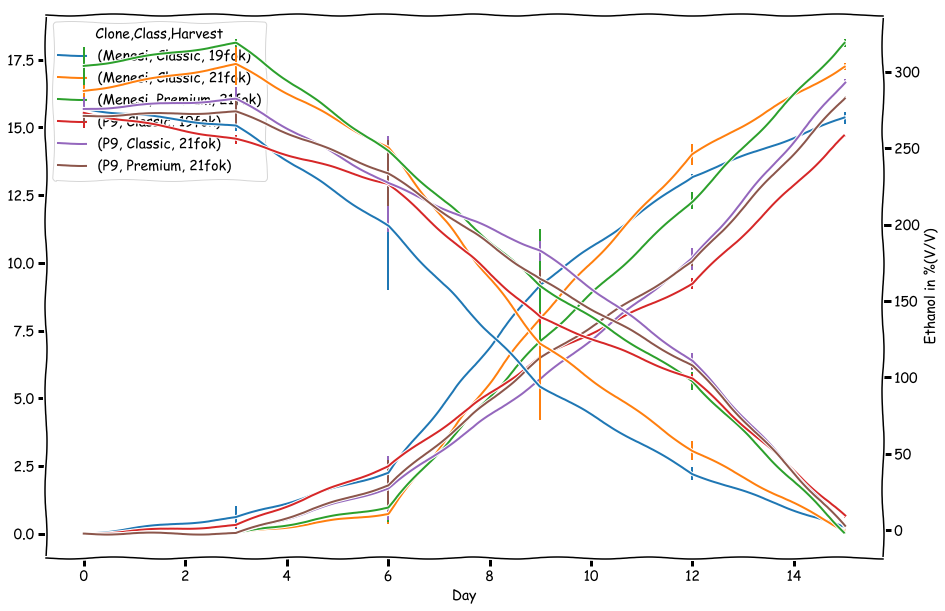

In [520]:
means[["Ethanol","Reducing sugar"]] = means[["Ethanol","Reducing sugar"]].fillna(0)
with plt.xkcd():    
    fig, ax1 = plt.subplots(figsize=(15,10))
    ax2 = ax1.twinx()
    means.unstack()["Ethanol"].transpose().plot(yerr=errors.unstack()["Ethanol"].transpose(), ax=ax1)
    means.unstack()["Reducing sugar"].transpose().plot(yerr=errors.unstack()["Reducing sugar"].transpose(), ax=ax2, legend=False)
    plt.ylabel('Ethanol in %(V/V)')
    fig.savefig('e:/Jupyter/Pictures/Kadarka_19_21_Ethanol_Sugar.pdf')

In [420]:
from IPython.html import widgets
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [521]:
def plt_chart(x, y=None, ylabel="", ylabel2="", sizeV=10, sizeH=16, yerr=False, filename="\plot.pdf", autolabel=True):
    if y is None:
        data = means[x] = means[x].fillna(0)
        with plt.xkcd():    
            fig, ax = plt.subplots(figsize=(sizeH,sizeV))
            if yerr is True:
                means.unstack()[x].transpose().plot(yerr=errors.unstack()[x].transpose(), ax=ax)
            else:
                means.unstack()[x].transpose().plot(ax=ax)
            if autolabel is True:
                ax.set_ylabel(x)
            else:
                ax.set_ylabel(ylabel)
            fig.savefig(filename)
    else:
        data = means[[x,y]] = means[[x,y]].fillna(0)
        with plt.xkcd():    
            fig, ax1 = plt.subplots(figsize=(sizeH,sizeV))
            ax2 = ax1.twinx()
            if yerr is True:
                means.unstack()[x].transpose().plot(yerr=errors.unstack()[x].transpose(), ax=ax1)
                means.unstack()[y].transpose().plot(yerr=errors.unstack()[y].transpose(), ax=ax2, legend=False)
            else:
                means.unstack()[x].transpose().plot(ax=ax1)
                means.unstack()[y].transpose().plot(ax=ax2, legend=False)
            if autolabel is True:
                ax1.set_ylabel(x)
                ax2.set_ylabel(y)
            else:
                ax1.set_ylabel(ylabel)
                ax2.set_ylabel(ylabel2)
            
            fig.savefig(filename)

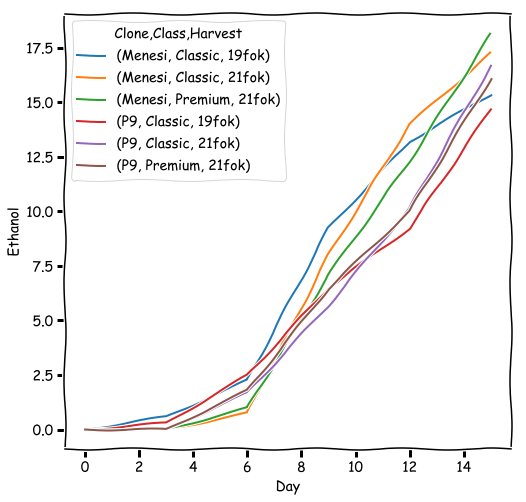

In [522]:
plt_chart("Ethanol",ylabel="Ethanol conc", yerr=False, sizeH=8, sizeV=8, filename="e:\Jupyter\Pictures\plottest.pdf")

In [ ]:
a = list()
for n in means.columns:
    a.append(n)
a.append(None)

i = interact(plt_chart,
             x=a,
             y=a,
             sizeH=(0,20),
             sizeV=(0,20),
             yerr = widgets.Checkbox(value=False, description='Error bars',disabled=False),
             autolabel = widgets.Checkbox(value=True, description='Automatic Y-axis labeling',disabled=False)
             )

In [ ]:
i.widget

<img src="/files/widget.png">